======================== Welcome to the Investment Analysis Tool ========================
To get started, please enter your name: Ben

Hello, Ben! This program provides two key financial tools:

1️.  Portfolio Optimization and Benchmarking
   - Analyze portfolio performance against a benchmark index.
   - Optimize asset allocation for maximum returns.
   - Perform Monte Carlo simulations to evaluate risk.

2️.  Stock Forecasting
   - Predict future stock prices using machine learning.
   - Visualize stock trends and moving averages.
   - Make informed investment decisions based on forecasts.

What is the value of your initial investment? 1000
You have invested $1000.0.
Provide the ticker symbol for the index to benchmark your portfolio against (e.g., ^GSPC for S&P 500): ^GSPC
You have selected ^GSPC as your benchmark.
Provide the start date for your portfolio performance (YYYY-MM-DD): 2000-01-01
Provide the end date for your portfolio performance (YYYY-MM-DD): 2025-01-01
You have selec

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


=================== Portfolio Value vs Benchmark ===================



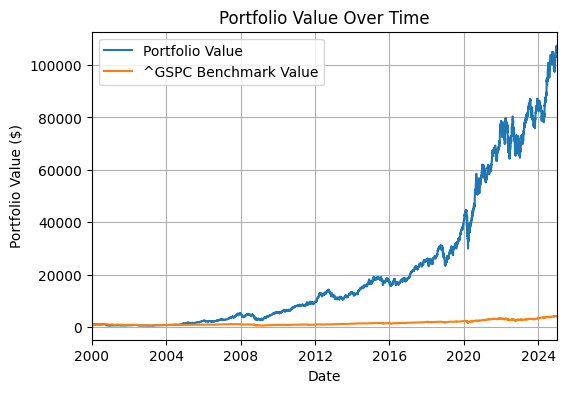


=================== Portfolio Value as of 2025-01-01 ===================

The ending simulated portfolio value is: $104892.88


[*********************100%***********************]  3 of 3 completed



===================== Optimal Portfolio Allocation =====================

F: 63.81%
KO: 0.00%
AAPL: 36.19%

====================== Individual Stock Breakdown ======================

F:
  P/E Ratio: 6.93
  PEG Ratio: N/A
  Beta: 1.61
  Dividend Yield: 758.00%
  ROE: 13.45%
  1-Year Return: -18.25%
  DCF Valuation: $18,039,000,000

KO:
  P/E Ratio: 29.51
  PEG Ratio: N/A
  Beta: 0.57
  Dividend Yield: 286.00%
  ROE: 39.55%
  1-Year Return: 18.58%
  DCF Valuation: $314,309,624,832

AAPL:
  P/E Ratio: 36.31
  PEG Ratio: N/A
  Beta: 1.18
  Dividend Yield: 42.00%
  ROE: 136.52%
  1-Year Return: 38.39%
  DCF Valuation: $1,970,511,298,560

========================== Sector Allocation ==========================



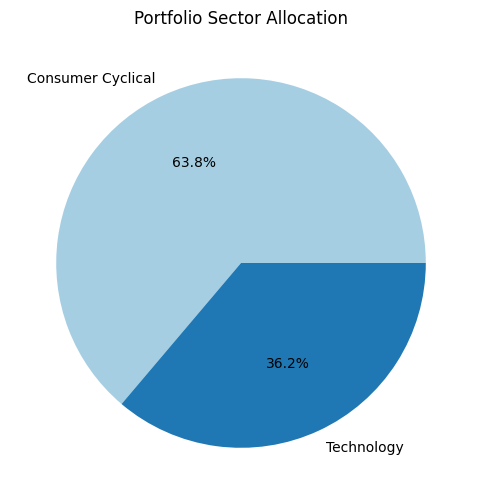


======================== Monte Carlo Simulation ========================



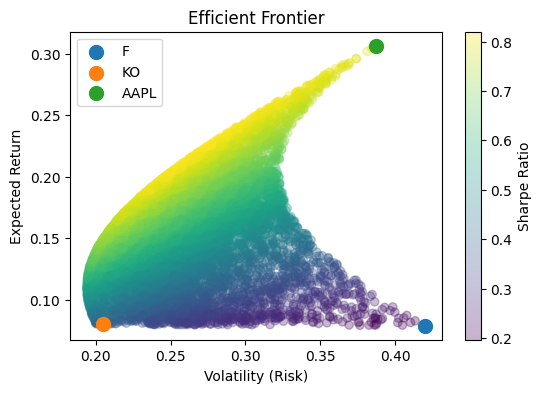


============================== Forecasts ==============================

Include the stocks you would like to forecast separated by spaces: F KO
You have selected ['F', 'KO'] to forecast.
How many days would you like to forecast? 120


[*********************100%***********************]  1 of 1 completed


F: MSE=0.02, R2=1.00


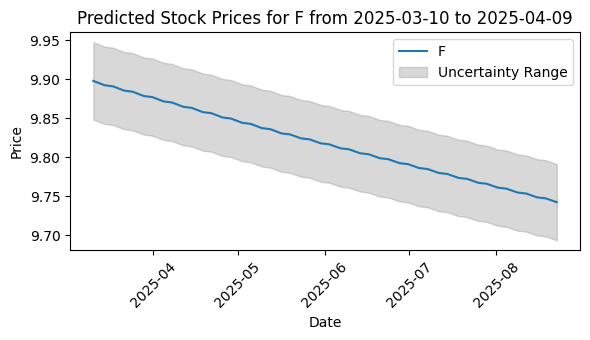

[*********************100%***********************]  1 of 1 completed


KO: MSE=0.07, R2=1.00


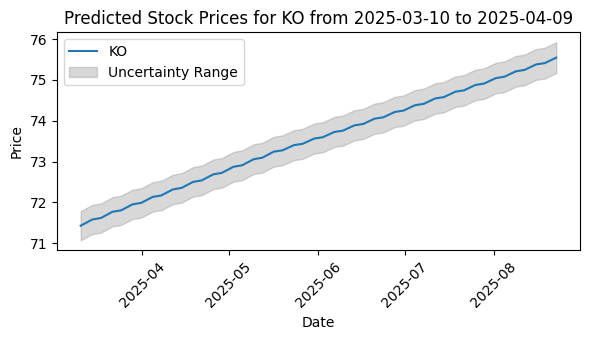


========================= Forecasts completed =========================


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings

warnings.filterwarnings('ignore')


import time

# Welcome and Initialization
print("======================== Welcome to the Investment Analysis Tool ========================")
user = input("To get started, please enter your name: ").strip().title()

print(f"\nHello, {user}! This program provides two key financial tools:")
time.sleep(1)  # Pause for readability
print("\n1️.  Portfolio Optimization and Benchmarking")
print("   - Analyze portfolio performance against a benchmark index.")
print("   - Optimize asset allocation for maximum returns.")
print("   - Perform Monte Carlo simulations to evaluate risk.")

time.sleep(1)
print("\n2️.  Stock Forecasting")
print("   - Predict future stock prices using machine learning.")
print("   - Visualize stock trends and moving averages.")
print("   - Make informed investment decisions based on forecasts.\n")

time.sleep(1)
print("=" * 90)



investment = float(input("What is the value of your initial investment? "))
print(f"You have invested ${investment}.")


index_input = input("Provide the ticker symbol for the index to benchmark your portfolio against (e.g., ^GSPC for S&P 500): ")
print(f"You have selected {index_input} as your benchmark.")


from datetime import datetime

while True:
    try:
        start_date = input("Provide the start date for your portfolio performance (YYYY-MM-DD): ")
        end_date = input("Provide the end date for your portfolio performance (YYYY-MM-DD): ")
        start_date = datetime.strptime(start_date,"%Y-%m-%d").date()
        end_date = datetime.strptime(end_date,"%Y-%m-%d").date()
        break
    except ValueError as e:
        print("Invalid format")
print(f"You have selected {start_date} as your start date and {end_date} as your end date.")



user_tickers = input("Enter portfolio stock ticker symbols separated by spaces: ").split()
tickers = user_tickers
print(f"\nThis portfolio is comprised of {tickers}")

def get_stock_data(tickers, start=start_date, end=end_date):
    data = yf.download(tickers, start=start, end=end)
    data = data['Close'] if 'Close' in data.columns else data['Adj Close']
    return data.pct_change().dropna()





def simulate_portfolio_value(returns, optimal_weights, initial_investment=investment):
    weighted_returns = (returns * optimal_weights).sum(axis=1)
    cumulative_returns = (1 + weighted_returns).cumprod()
    return initial_investment * cumulative_returns





def backtest_portfolio_vs_benchmark(tickers, optimal_weights, benchmark_symbol=index_input, start=start_date, end=end_date, initial_investment=investment):
    returns = get_stock_data(tickers, start, end)
    benchmark_data = yf.download(benchmark_symbol, start=start, end=end)
    if benchmark_data.empty or 'Close' not in benchmark_data.columns:
        print("Error: Could not fetch benchmark data or 'Close' column is missing.")
        return None

    initial_price = benchmark_data['Close'].iloc[0]
    initial_shares = initial_investment / initial_price
    benchmark_value = benchmark_data['Close'] * initial_shares
    benchmark_returns = benchmark_data['Close'].pct_change().dropna()
    return benchmark_returns, benchmark_value


returns = get_stock_data(tickers)
index_returns = get_stock_data([index_input])

returns = get_stock_data(tickers)

# Monte Carlo Simulation for Portfolio Optimization
def monte_carlo_simulation(returns, num_simulations=10000):
    num_assets = len(returns.columns)
    results = np.zeros((3, num_simulations))
    for i in range(num_simulations):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_return = np.sum(weights * returns.mean() * 252)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        sharpe_ratio = portfolio_return / portfolio_volatility
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio
    return results





# Portfolio Optimization based on Sharpe Ratio
def optimize_portfolio(returns):
    num_assets = len(returns.columns)

    def neg_sharpe(weights):
        weights = np.array(weights)
        portfolio_return = np.sum(weights * returns.mean() * 252)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        return -portfolio_return / portfolio_volatility

    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]

    result = minimize(neg_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x


optimal_weights = optimize_portfolio(returns)

# Plot Efficiency Frontier
def plot_efficient_frontier(results, tickers, returns):
    plt.figure(figsize=(6, 4))
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', alpha=0.3)
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Efficient Frontier')

    for i, ticker in enumerate(tickers):
        plt.scatter(np.std(returns[ticker]) * np.sqrt(252), np.mean(returns[ticker]) * 252, marker='o', s=100, label=ticker)

    plt.legend()
    plt.show()

# Get sector weights
def calculate_sector_weights(tickers, weights):
    sectors = {ticker: yf.Ticker(ticker).info.get('sector', 'Unknown') for ticker in tickers}
    sector_weights = {}
    for ticker, weight in zip(tickers, weights):
        sector = sectors[ticker]
        if sector in sector_weights:
            sector_weights[sector] += weight
        else:
            sector_weights[sector] = weight
    return sector_weights

# Plot sector allocation
def plot_sector_allocation(sector_weights):
    filtered_sector_weights = {sector: weight for sector, weight in sector_weights.items() if weight > 0}
    if filtered_sector_weights:
        plt.figure(figsize=(6, 6))
        plt.pie(filtered_sector_weights.values(), labels=filtered_sector_weights.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
        plt.title("Portfolio Sector Allocation")
        plt.show()
    else:
        print("No sectors with non-zero weights to display.")


# Simplified DCF calculation
def calculate_dcf(free_cash_flow):
    discount_rate = 0.1
    growth_rate = 0.05
    dcf_value = free_cash_flow * (1 + growth_rate) / (discount_rate - growth_rate)
    return dcf_value


def get_stock_fundamentals(tickers):
    fundamentals = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info


        pe_ratio = info.get('trailingPE', 'N/A')
        peg_ratio = info.get('pegRatio', 'N/A')
        beta = info.get('beta', 'N/A')
        dividend_yield = info.get('dividendYield', 'N/A')
        roe = info.get('returnOnEquity', 'N/A')
        one_year_return = info.get('52WeekChange', 'N/A')


        free_cash_flow = info.get('freeCashflow', None)
        dcf_value = calculate_dcf(free_cash_flow) if free_cash_flow else 'N/A'


        fundamentals[ticker] = {
            'P/E Ratio': pe_ratio,
            'PEG Ratio': peg_ratio,
            'Beta': beta,
            'Dividend Yield': dividend_yield,
            'ROE': roe,
            '1-Year Return': one_year_return,
            'DCF Valuation': dcf_value
        }

    return fundamentals


benchmark_returns, benchmark_value = backtest_portfolio_vs_benchmark(
    tickers, optimal_weights, index_input, start_date, end_date, investment
)


start_date_dt = pd.to_datetime(start_date)
end_date_dt = pd.to_datetime(end_date)


date_range = pd.date_range(start=start_date_dt, end=end_date_dt, freq='D')
filtered_returns = returns.reindex(date_range)
portfolio_value = simulate_portfolio_value(filtered_returns, optimal_weights)
portfolio_value.index = pd.date_range(start=start_date_dt, end=end_date_dt, freq='D')

print("=================== Portfolio Value vs Benchmark ===================\n")

plt.figure(figsize=(6, 4))
plt.plot(portfolio_value.index, portfolio_value.values, label="Portfolio Value")
plt.plot(benchmark_value.index, benchmark_value.values, label=f"{index_input} Benchmark Value")

plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.xlim(start_date_dt, end_date_dt)
plt.show()



portfolio_value = simulate_portfolio_value(returns, optimal_weights, investment)
print(f"\n=================== Portfolio Value as of {end_date} ===================")
print(f"\nThe ending simulated portfolio value is: ${portfolio_value[-1]:.2f}")



#optimal portfolio breakdown
returns = get_stock_data(tickers)
optimal_weights = optimize_portfolio(returns)
print("\n===================== Optimal Portfolio Allocation =====================\n")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

# Display stock fundamentals
fundamentals = get_stock_fundamentals(tickers)
print("\n====================== Individual Stock Breakdown ======================")
for ticker, data in fundamentals.items():
    print(f"\n{ticker}:")
    for key, value in data.items():
        if isinstance(value, (int, float)):
            if "Return" in key or "ROE" in key or "Dividend Yield" in key:
                print(f"  {key}: {value * 100:.2f}%")
            elif "DCF Valuation" in key:
                print(f"  {key}: ${value:,.0f}")
            else:
                print(f"  {key}: {value:.2f}")
        else:
            print(f"  {key}: {value}")



# Plot sector weights
print("\n========================== Sector Allocation ==========================\n")
sector_weights = calculate_sector_weights(tickers, optimal_weights)
plot_sector_allocation(sector_weights)
print("\n======================== Monte Carlo Simulation ========================\n")
# Display Monte Carlo results
results = monte_carlo_simulation(returns)
plot_efficient_frontier(results, tickers, returns)
print("\n============================== Forecasts ==============================\n")








# User Input for Stocks
predicted_tickers = input("Include the stocks you would like to forecast separated by spaces: ").split()
predicted_tickers = [ticker.upper() for ticker in predicted_tickers]
print(f"You have selected {predicted_tickers} to forecast.")

# Set Forecasting Horizon
forecast_days = int(input("How many days would you like to forecast? "))
end_date = pd.to_datetime("today")
future_dates = pd.date_range(start=end_date, periods=forecast_days, freq='B')

for ticker in predicted_tickers:
    plt.figure(figsize=(6, 3.5))

    # Fetch stock data
    data = yf.download(ticker)

    # Calculate moving averages
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data = data.dropna()

    # Define features and target
    X = data[['Close', 'MA_10', 'MA_50']]
    y = data['Close'].shift(-1).dropna()
    X = X[:-1]  # Align features with target

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{ticker}: MSE={mse:.2f}, R2={r2:.2f}")

    last_known_data = X.iloc[-1].values.reshape(1, -1)
    future_predictions = []
    # Initialize lists for y_lower and y_upper
    y_lower = []
    y_upper = []

    for _ in range(forecast_days):
        predicted_price = float(model.predict(last_known_data)[0])
        future_predictions.append(predicted_price)

        # Calculate standard deviation (you can adjust this value)
        std_dev = 0.005 * predicted_price  # Assuming 5% standard deviation

        # Calculate y_lower and y_upper based on standard deviation
        y_lower.append(predicted_price - std_dev)
        y_upper.append(predicted_price + std_dev)

        # Update moving averages
        ma_10 = np.mean(future_predictions[-10:]) if len(future_predictions) >= 10 else predicted_price
        ma_50 = np.mean(future_predictions[-50:]) if len(future_predictions) >= 50 else predicted_price
        last_known_data = np.array([[predicted_price, ma_10, ma_50]], dtype=np.float64).reshape(1, -1)

    # Plot each stock's predictions
    plt.plot(future_dates, future_predictions, label=ticker, linestyle='solid')

    # Final Plot Formatting for each stock
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted Stock Prices for {ticker} from {end_date.date()} to {(end_date + pd.Timedelta(days=30)).date()}')
    plt.xticks(rotation=45)
    plt.fill_between(future_dates, y_lower, y_upper, color='gray', alpha=0.3, label='Uncertainty Range')
    plt.legend()
    plt.tight_layout()
    plt.show()


print("\n========================= Forecasts completed =========================")